# DEFINE PROBLEM

- Company's workload almost overload, it caused by many's employee has absentee problem
- Company need to find out which category of employee that has absentee problem
- Company also need to know what is the factors that might be the cause to it

# DEFINE GOALS

- To find out which category of employee that has absentee problem
- To find out which category of employee that has indication to have absentee problem
- To find out factors who affect employee's absentee

### IMPORT COMMON PACKAGE

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import joblib

import dython
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u
import dateparser
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 999

### IMPORT FILE

In [2]:
df = pd.read_csv('Absenteeism.csv', delimiter = ';')
df_eda = df.copy()

### DATA TYPE OVERALL CHECK

In [3]:
df_eda.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.55,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.55,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.55,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.55,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.55,97,0,1,2,1,0,1,90,172,30,2


##### COLUMNS DESCRIPTION
Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [4]:
print(df_eda.shape)

(740, 21)


### COLUMN SUMMARY

In [5]:
employeedesc = []

for i in df_eda.columns:
    employeedesc.append([
        i,
        df_eda[i].dtypes,
        df_eda[i].isna().sum(),
        (((df_eda[i].isna().sum()) / len(df_eda)) * 100).round(2),
        df_eda[i].nunique(),
        df_eda[i].drop_duplicates().sample(2).values
    ])

In [6]:
pd.DataFrame(data = employeedesc,
             columns = [
                 'Features', 
                 'DataType', 
                 'Null', 
                 'NullPercentage', 
                 'Unique', 
                 'Unique Sample'
             ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,ID,int64,0,0.00,36,"[30, 23]"
1,Reason for absence,int64,0,0.00,28,"[25, 19]"
2,Month of absence,int64,0,0.00,13,"[3, 8]"
3,Day of the week,int64,0,0.00,5,"[6, 2]"
4,Seasons,int64,0,0.00,4,"[3, 2]"
5,Transportation expense,int64,0,0.00,24,"[155, 289]"
6,Distance from Residence to Work,int64,0,0.00,25,"[13, 26]"
7,Service time,int64,0,0.00,18,"[10, 13]"
8,Age,int64,0,0.00,22,"[50, 47]"
9,Work load Average/day,float64,0,0.00,38,"[261.306, 251.81799999999998]"


In [7]:
## df.head(), df.shape, df.info() is utilized to capture dataset genereal information

## DATA PREPARATION BEFORE OUTLIERS & MISSING VALUE CHECKING

- Remove unecessary columns => id
- Remove redundant columns => weight and height since we already have BMI

In [8]:
df_eda.drop(columns = ['ID'], inplace = True)
df_eda.drop(columns = ['Weight'], inplace = True)
df_eda.drop(columns = ['Height'], inplace = True)

In [9]:
#Since I just predict which employees have absentee or not so I changed Absenteeism time to only Absentee that consist 1 to Absent and 0 to Not Absent 

def absent(row):
    if row['Absenteeism time in hours'] == 0:
       return 0
    else:
       return 1
 
df_eda['Absenteeism time in hours'] = df_eda.apply(absent, axis=1)
df_eda = df_eda.rename(columns = {'Absenteeism time in hours' : 'Absenteeism'})
df_eda

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism
0,26,7,3,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1
1,0,7,3,1,118,13,18,50,239.55,97,1,1,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239.55,97,0,1,0,1,0,0,31,1
3,7,7,5,1,279,5,14,39,239.55,97,0,1,2,1,1,0,24,1
4,23,7,5,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.60,93,0,1,2,1,0,1,30,1
736,11,7,3,1,235,11,14,37,264.60,93,0,3,1,0,0,1,29,1
737,0,0,3,1,118,14,13,40,271.22,95,0,1,1,1,0,8,34,0
738,0,0,4,2,231,35,14,39,271.22,95,0,1,2,1,0,2,35,0


# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

### DESCRIPTIVE ANALYSIS

In [10]:
round(df_eda.describe(),2)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism
count,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00
mean,19.22,6.32,3.91,2.54,221.33,29.63,12.55,36.45,271.49,94.59,0.05,1.29,1.02,0.57,0.07,0.75,26.68,0.94
std,8.43,3.44,1.42,1.11,66.95,14.84,4.38,6.48,39.06,3.78,0.23,0.67,1.10,0.50,0.26,1.32,4.29,0.24
min,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205.92,81.00,0.00,1.00,0.00,0.00,0.00,0.00,19.00,0.00
25%,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244.39,93.00,0.00,1.00,0.00,0.00,0.00,0.00,24.00,1.00
50%,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264.25,95.00,0.00,1.00,1.00,1.00,0.00,0.00,25.00,1.00
75%,26.00,9.00,5.00,4.00,260.00,50.00,16.00,40.00,294.22,97.00,0.00,1.00,2.00,1.00,0.00,1.00,31.00,1.00
max,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378.88,100.00,1.00,4.00,4.00,1.00,1.00,8.00,38.00,1.00


### MISSING VALUE CHECK & HANDLING

In [11]:
df_eda.isna().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Body mass index                    0
Absenteeism                        0
dtype: int64

In [12]:
#there's no missing value in the dataset
df_clean = df_eda.copy()

### OUTLIERS CHECK & HANDLING

In [13]:
df_clean.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index', 'Absenteeism'],
      dtype='object')

In [14]:
# Select columns to plot

cols_to_plot = df_clean[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism']]

Graph for Reason for absence: Total = 28


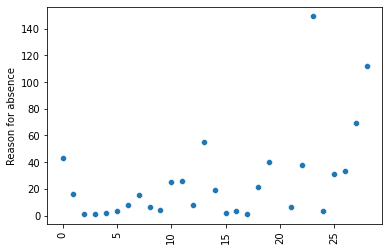

Graph for Month of absence: Total = 13


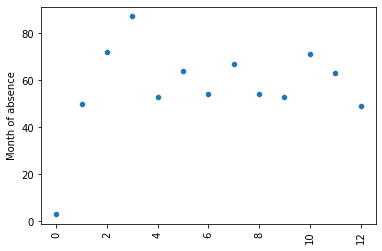

Graph for Day of the week: Total = 5


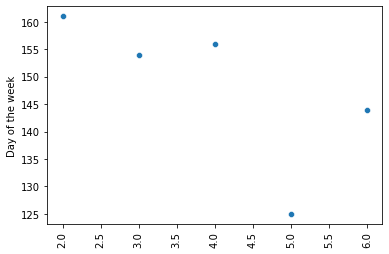

Graph for Seasons: Total = 4


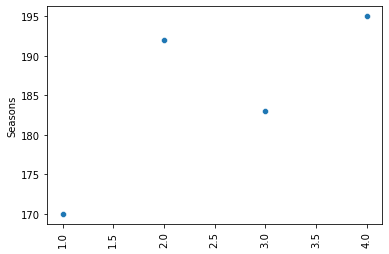

Graph for Transportation expense: Total = 24


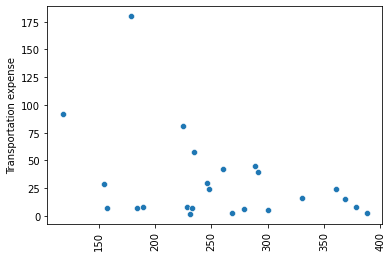

Graph for Distance from Residence to Work: Total = 25


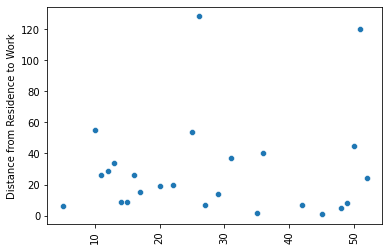

Graph for Service time: Total = 18


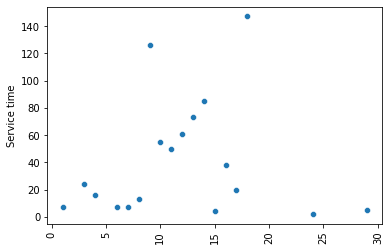

Graph for Age: Total = 22


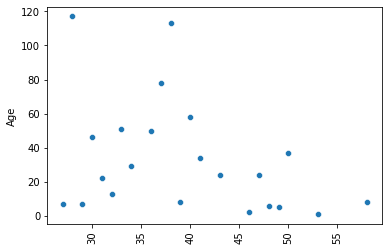

Graph for Work load Average/day : Total = 38


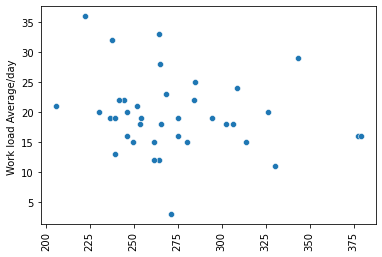

Graph for Hit target: Total = 13


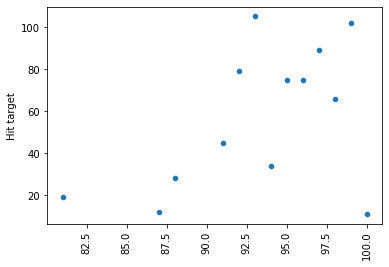

Graph for Disciplinary failure: Total = 2


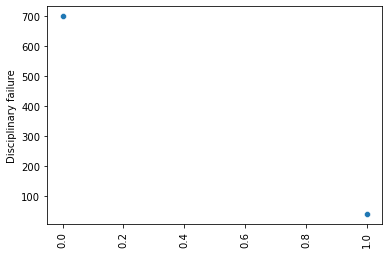

Graph for Education: Total = 4


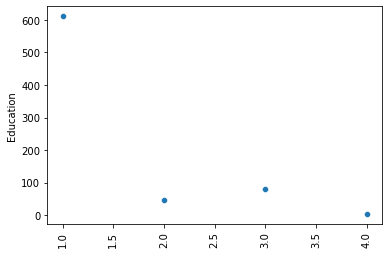

Graph for Son: Total = 5


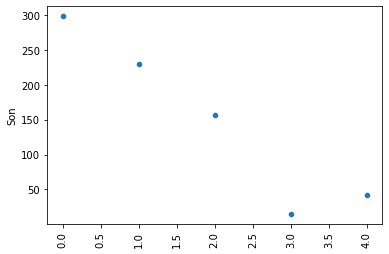

Graph for Social drinker: Total = 2


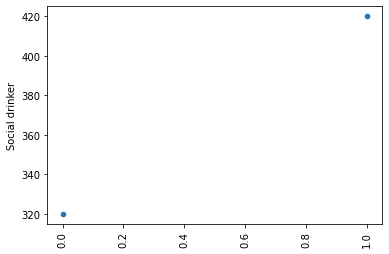

Graph for Social smoker: Total = 2


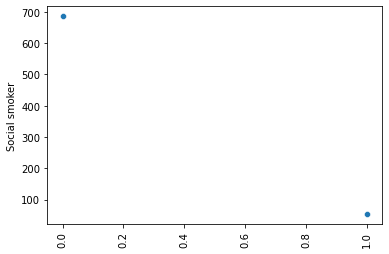

Graph for Pet: Total = 6


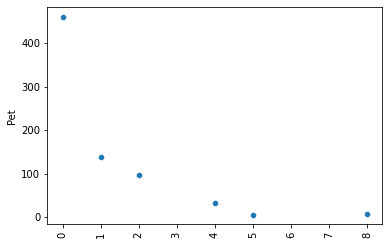

Graph for Body mass index: Total = 17


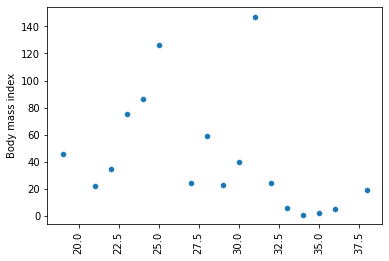

Graph for Absenteeism: Total = 2


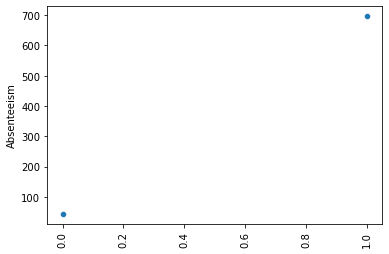

In [15]:
def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print(f'Graph for {i}: Total = {len(cat_num)}')
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
        
plot_scatterplots()

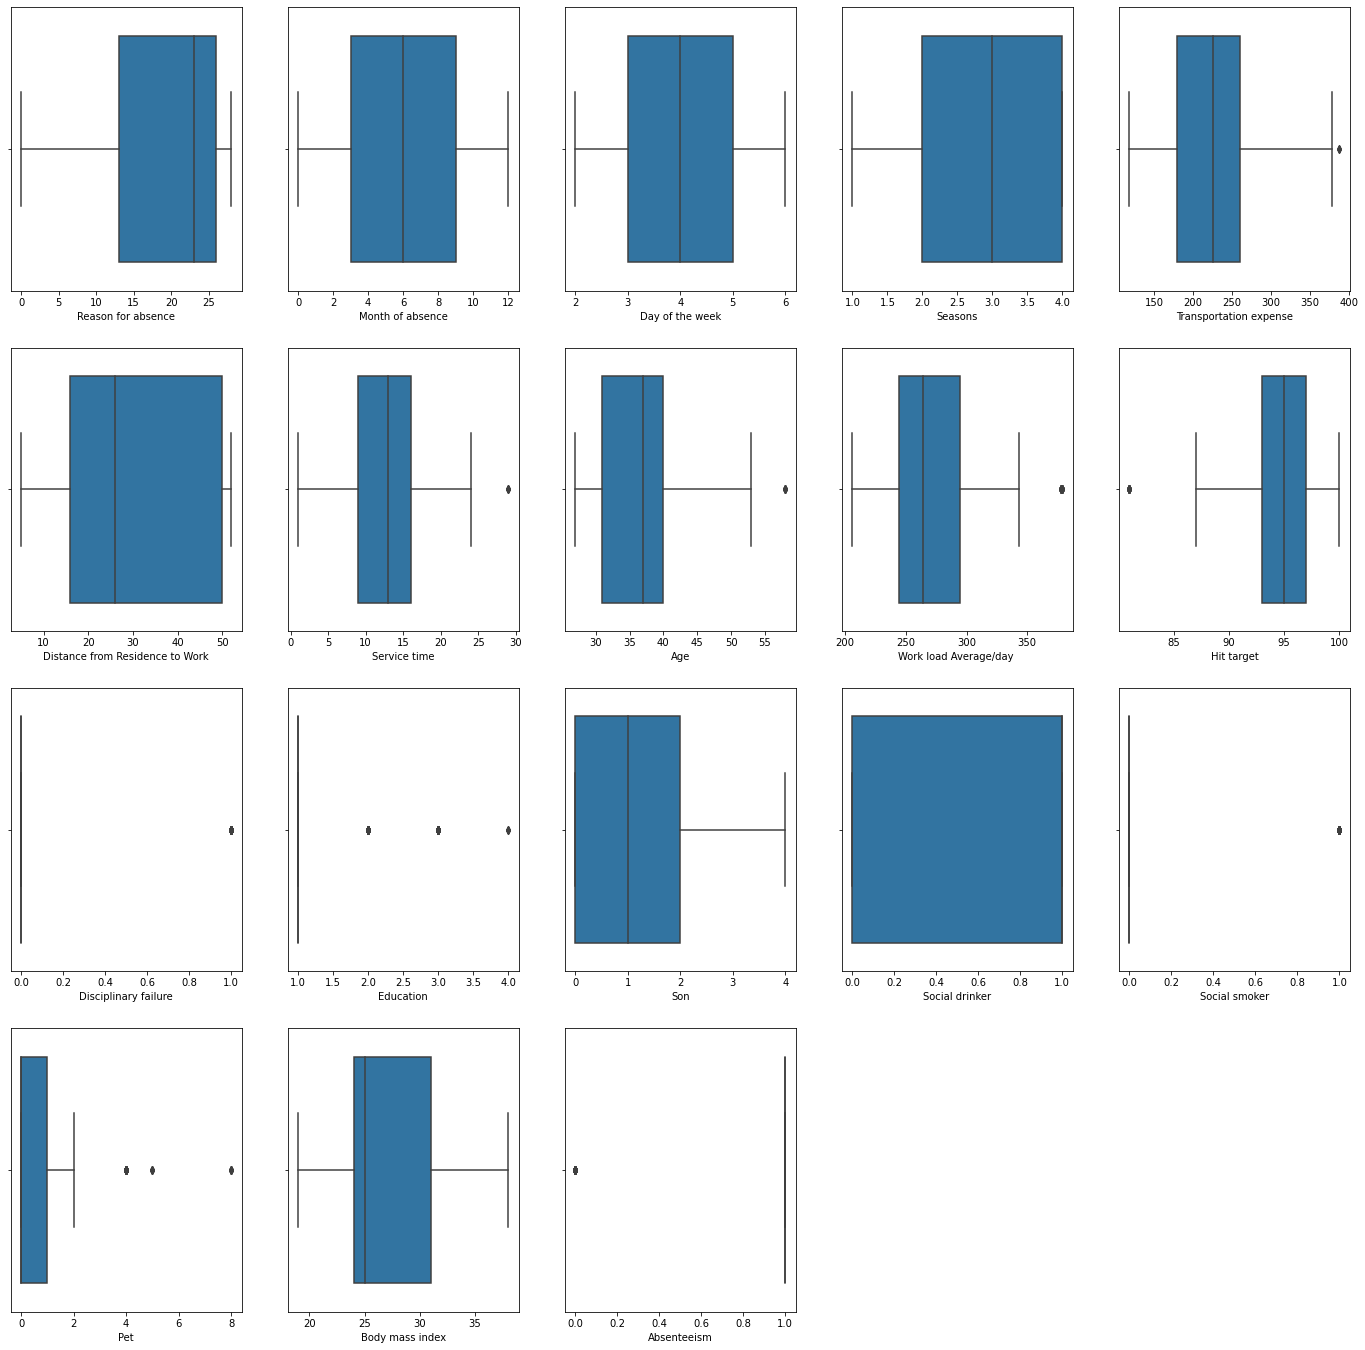

In [16]:
df_outliers = df_eda.copy()
plt.figure(figsize =(24, 24))
x = 1

for column in df_outliers.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_outliers[column])
    x+=1
    
plt.show()

- There are outliers in some columns data

In [17]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [18]:
# function to get unique values
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            
    return unique_list

In [19]:
df_clean[df_clean.Age >50]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism
255,18,8,3,1,228,14,16,58,265.62,94,0,1,2,0,0,1,22,1
434,18,5,4,3,228,14,16,58,246.07,99,0,1,2,0,0,1,22,1
521,1,10,4,4,228,14,16,58,284.85,91,0,1,2,0,0,1,22,1
620,25,3,3,2,228,14,16,58,222.20,99,0,1,2,0,0,1,22,1
622,12,3,3,2,228,14,16,58,222.20,99,0,1,2,0,0,1,22,1
640,25,3,4,2,228,14,16,58,222.20,99,0,1,2,0,0,1,22,1
727,6,7,2,1,228,14,16,58,264.60,93,0,1,2,0,0,1,22,1
729,6,7,3,1,228,14,16,58,264.60,93,0,1,2,0,0,1,22,1
739,0,0,6,3,179,45,14,53,271.22,95,0,1,1,0,0,1,25,0


In [20]:
df_clean[df_clean['Hit target'] < 82.5]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism
270,11,9,2,1,179,51,18,38,294.22,81,0,1,0,1,0,0,31,1
271,23,9,6,1,179,51,18,38,294.22,81,0,1,0,1,0,0,31,1
272,19,9,4,1,289,36,13,33,294.22,81,0,1,2,1,0,1,30,1
273,0,9,5,1,235,20,13,43,294.22,81,1,1,1,1,0,0,38,0
274,9,9,2,1,246,25,16,41,294.22,81,0,1,0,1,0,0,23,1
275,28,9,3,1,291,31,12,40,294.22,81,0,1,1,1,0,1,25,1
276,0,9,3,1,231,35,14,39,294.22,81,1,1,2,1,0,2,35,0
277,0,9,3,1,291,50,12,32,294.22,81,1,1,0,1,0,0,23,0
278,13,9,4,1,179,51,18,38,294.22,81,0,1,0,1,0,0,31,1
279,9,9,4,1,246,25,16,41,294.22,81,0,1,0,1,0,0,23,1


In [21]:
df_clean[df_clean['Service time'] > 20]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism
234,28,6,2,1,289,48,29,49,377.55,94,0,1,0,0,0,2,36,1
507,4,10,5,4,289,48,29,49,284.85,91,0,1,0,0,0,2,36,1
510,14,10,4,4,289,48,29,49,284.85,91,0,1,0,0,0,2,36,1
513,23,10,5,4,289,48,29,49,284.85,91,0,1,0,0,0,2,36,1
576,10,1,5,2,289,48,29,49,313.53,96,0,1,0,0,0,2,36,1
647,23,3,4,3,118,15,24,46,222.20,99,0,1,2,1,1,0,25,1
706,7,6,4,3,118,15,24,46,275.09,96,0,1,2,1,1,0,25,1


In [22]:
# df_clean = df_clean[df_clean.bmi < 70]
# df_clean = df_clean[~df_clean['gender'].str.contains('Other')]

In [23]:
# df_clean.head()

#### Initial thoughts on graphs above.
There's some data that its distribution is too far away from others:
- Service time > 20
- Age > 50
- Hit target < 82.5
- Pet > 8

- But after recheck it, the outliers not much and still looks normal, so will keep it for now

In [24]:
df_clean.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index', 'Absenteeism'],
      dtype='object')

In [25]:
##rename column since to make it easier
df_clean = df_clean.rename(columns = {'Reason for absence' : 'Reason', 'Month of absence' : 'Month', 'Day of the week' : 'Day',
                                       'Distance from Residence to Work' : 'Distance', 'Work load Average/day ' : 'Workload',
                                     'Body mass index' : 'BMI'})
df_clean.head()

,Reason,Month,Day,Seasons,Transportation expense,Distance,Service time,Age,Workload,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,BMI,Absenteeism
0,26,7,3,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1
1,0,7,3,1,118,13,18,50,239.55,97,1,1,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239.55,97,0,1,0,1,0,0,31,1
3,7,7,5,1,279,5,14,39,239.55,97,0,1,2,1,1,0,24,1
4,23,7,5,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1


# DATA PREPARATION - FEATURES ENGINEERING

In [26]:
df_clean['Education'].value_counts()

1    611
3     79
2     46
4      4
Name: Education, dtype: int64

### FEATURES ENGINEERING FOR EDA

- Binning Transportation expense
- Binning Distance
- Binning Workload
- Binning Service Time
- Binning Hit target
- Binning BMI based on https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi
- Binning Age

#### Binning Transportation Expense

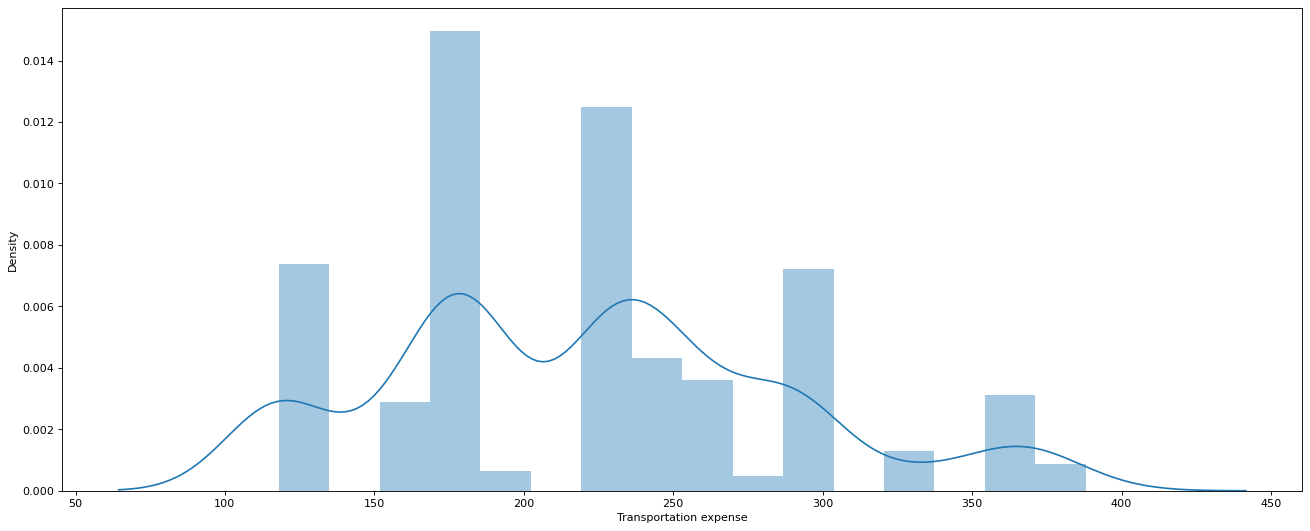

In [27]:
## Transportation Expense Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df_clean['Transportation expense'])
plt.show()

In [28]:
df_clean['Transportation expense'].max()

388

In [29]:
transport_bin = [117, 150, 200, 250, 300, 350, df_clean['Transportation expense'].max()]
transport_label = ['<150', '150-200', '200-250', '250-300', '300-350', '>350']

df_clean['Transportation_group'] = pd.cut(df_clean['Transportation expense'], bins = transport_bin, labels = transport_label)

#### Binning Distance

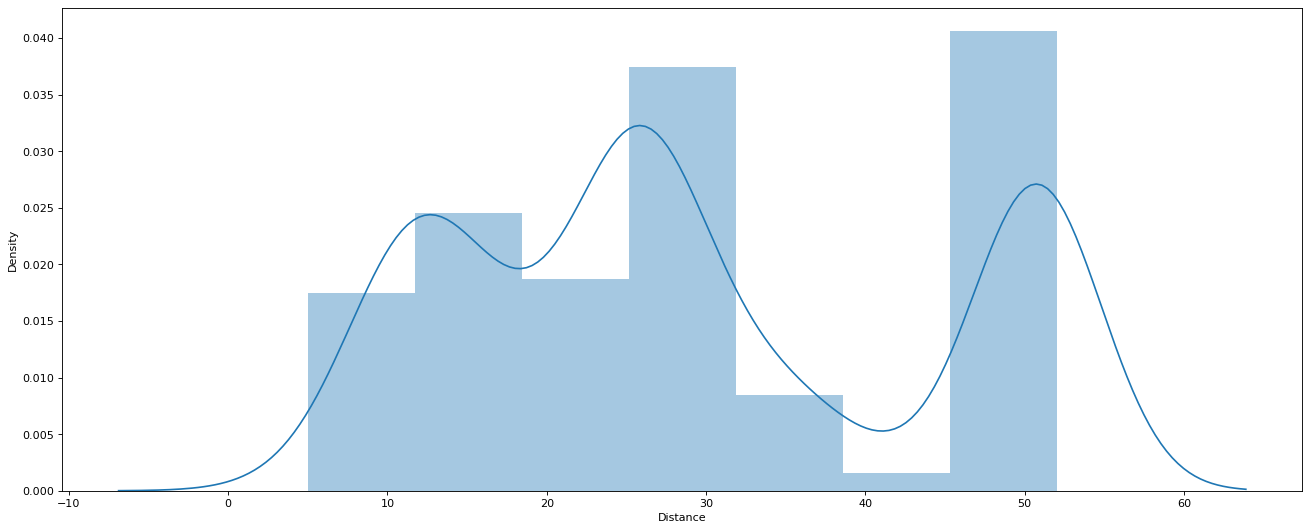

In [30]:
## Distance Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df_clean['Distance'])
plt.show()

In [31]:
df_clean['Distance'].min()

5

In [32]:
distance_bin = [3, 10, 20, 30, 40, 50, df_clean['Distance'].max()]
distance_label = ['<10', '10-20', '20-30', '30-40', '40-50', '>50']

df_clean['Distance_group'] = pd.cut(df_clean['Distance'], bins = distance_bin, labels = distance_label)

#### Binning Workload

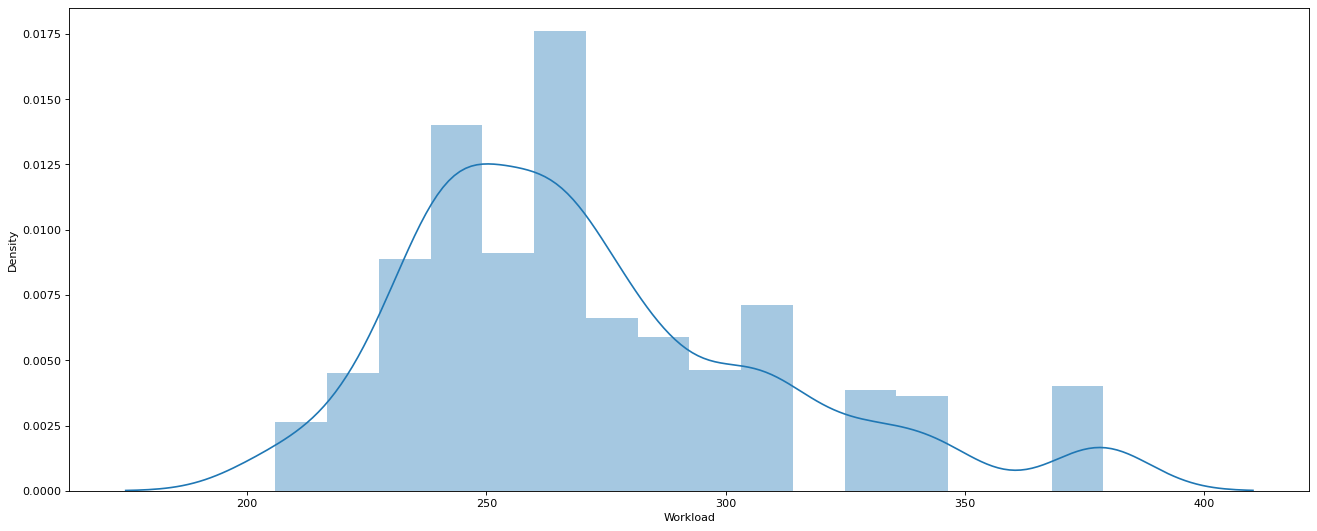

In [33]:
## Workload Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df_clean['Workload'])
plt.show()

In [34]:
df_clean['Workload'].min()

205.917

In [35]:
workload_bin = [200, 250, 300, 350, df_clean['Workload'].max()]
workload_label = ['200-250', '250-300', '300-350', '>350']

df_clean['workload_group'] = pd.cut(df_clean['Workload'], bins = workload_bin, labels = workload_label)

#### Binning Service Time

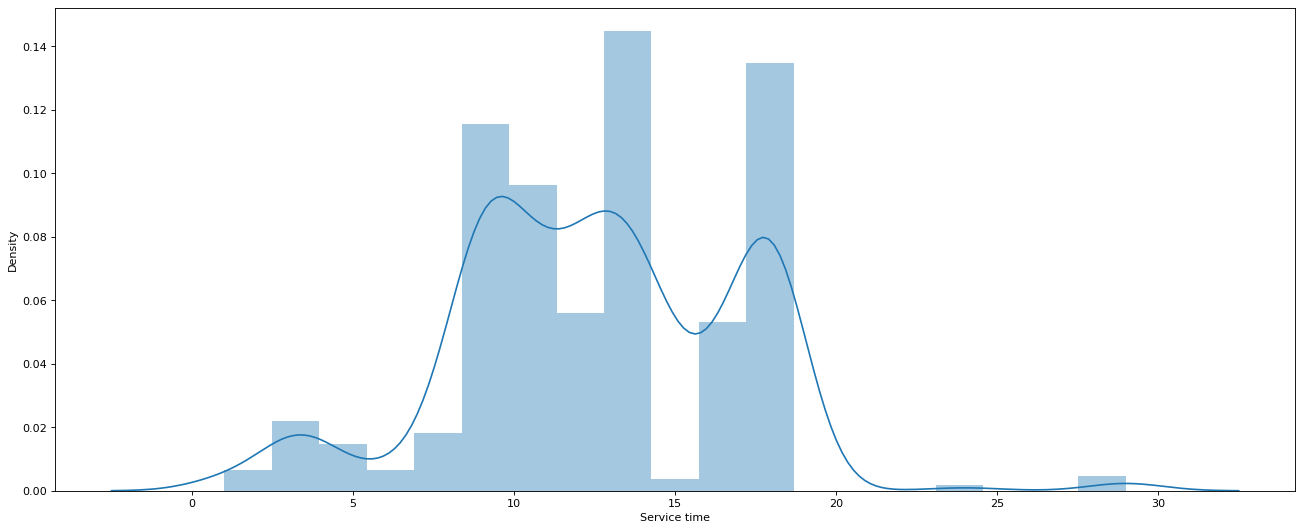

In [36]:
## Service Time Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df_clean['Service time'])
plt.show()

In [37]:
df_clean['Service time'].min()

1

In [38]:
service_bin = [0, 5, 10, 15, 20, df_clean['Service time'].max()]
service_label = ['<5', '5-10', '10-15', '15-20', '>20']

df_clean['service_group'] = pd.cut(df_clean['Service time'], bins = service_bin, labels = service_label)

#### Binning Hit Target

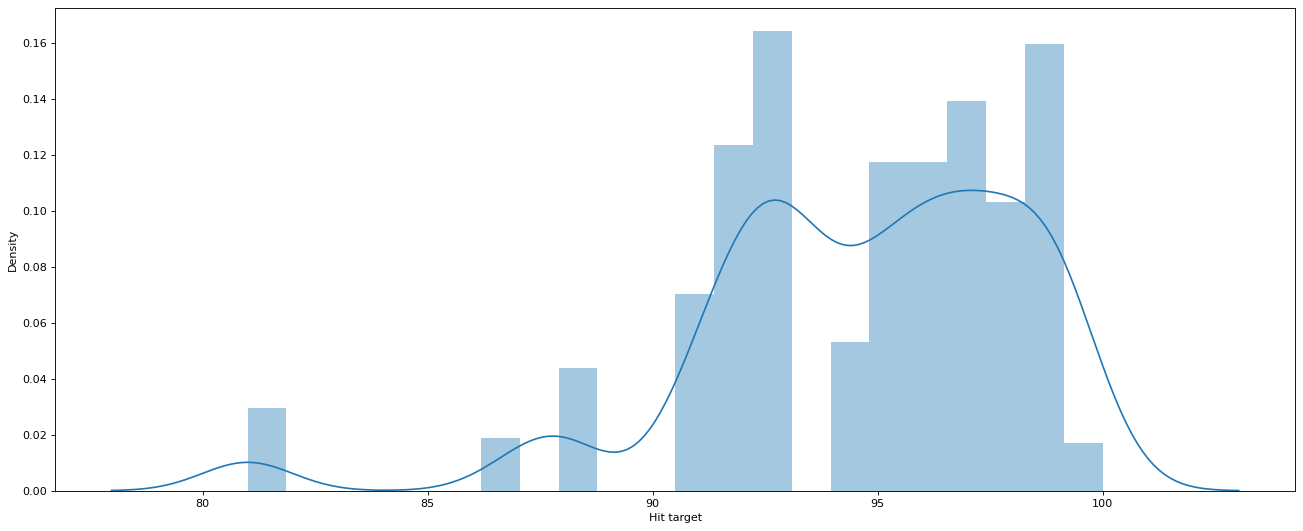

In [39]:
## Hit Target Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df_clean['Hit target'])
plt.show()

In [40]:
df_clean['Hit target'].min()

81

In [41]:
target_bin = [80, 85, 90, 95, df_clean['Hit target'].max()]
target_label = ['<85', '85-90', '90-95', '95-100']

df_clean['target_group'] = pd.cut(df_clean['Hit target'], bins = target_bin, labels = target_label)

#### Binning BMI

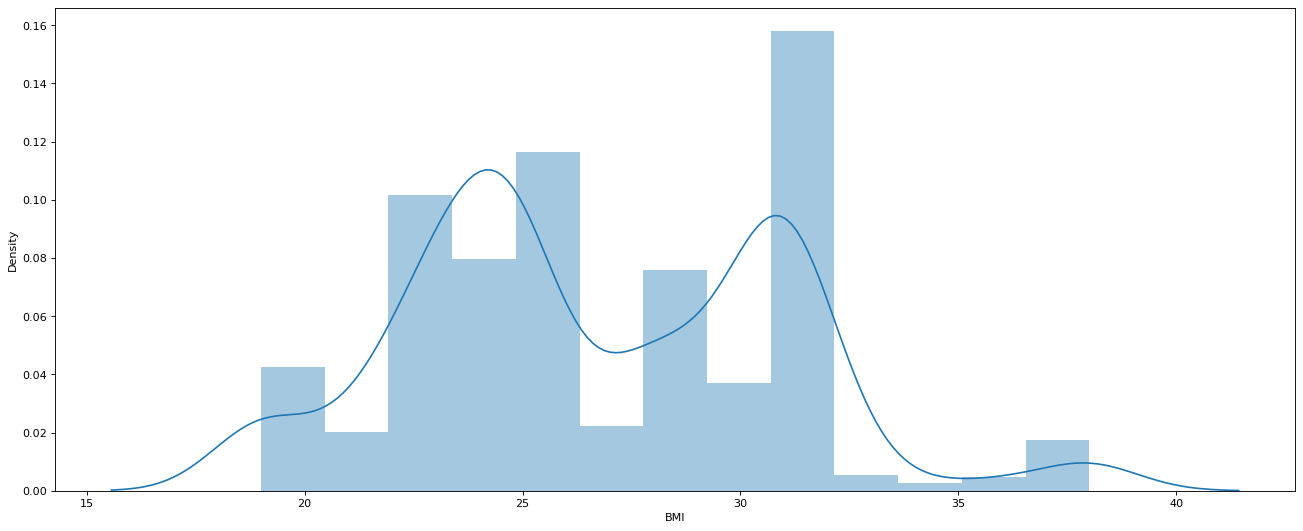

In [42]:
## BMI Level Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df_clean['BMI'])
plt.show()

In [43]:
df_clean['BMI'].min()

19

In [44]:
bmi_bin = [18.5, 25, 30, 35, df_clean['BMI'].max()]
bmi_label = ['Normal weight', 'Pre-obesity', 'Obesity class I', 'Obesity class II']

df_clean['bmi_group'] = pd.cut(df_clean['BMI'], bins = bmi_bin, labels = bmi_label)

In [45]:
df_clean['bmi_group'].value_counts()

Normal weight       390
Obesity class I     180
Pre-obesity         146
Obesity class II     24
Name: bmi_group, dtype: int64

#### Binning Age

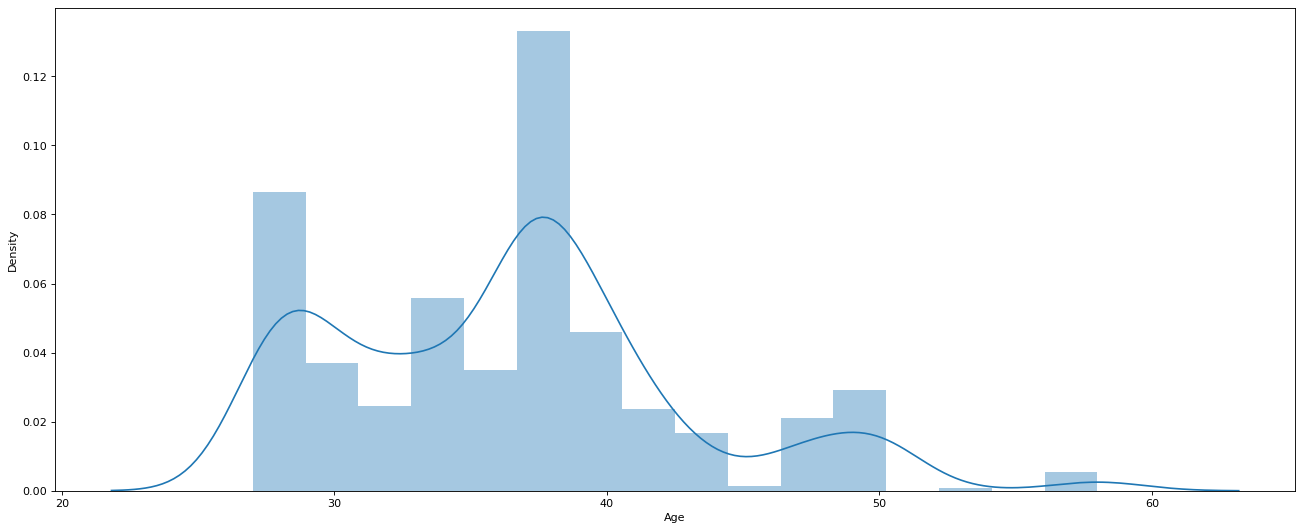

In [46]:
## Age Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df_clean['Age'])
plt.show()

In [47]:
df_clean['Age'].max()

58

In [48]:
age_bin = [25, 35, 50, df_clean['Age'].max()]
age_label = ['Young Adults', 'Middle-Aged Adults', 'Old Adults']

df_clean['age_group'] = pd.cut(df_clean['Age'], bins = age_bin , labels = age_label)

In [49]:
df_clean

,Reason,Month,Day,Seasons,Transportation expense,Distance,Service time,Age,Workload,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,BMI,Absenteeism,Transportation_group,Distance_group,workload_group,service_group,target_group,bmi_group,age_group
0,26,7,3,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1,250-300,30-40,200-250,10-15,95-100,Pre-obesity,Young Adults
1,0,7,3,1,118,13,18,50,239.55,97,1,1,1,1,0,0,31,0,<150,10-20,200-250,15-20,95-100,Obesity class I,Middle-Aged Adults
2,23,7,4,1,179,51,18,38,239.55,97,0,1,0,1,0,0,31,1,150-200,>50,200-250,15-20,95-100,Obesity class I,Middle-Aged Adults
3,7,7,5,1,279,5,14,39,239.55,97,0,1,2,1,1,0,24,1,250-300,<10,200-250,10-15,95-100,Normal weight,Middle-Aged Adults
4,23,7,5,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1,250-300,30-40,200-250,10-15,95-100,Pre-obesity,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.60,93,0,1,2,1,0,1,30,1,250-300,30-40,250-300,10-15,90-95,Pre-obesity,Young Adults
736,11,7,3,1,235,11,14,37,264.60,93,0,3,1,0,0,1,29,1,200-250,10-20,250-300,10-15,90-95,Pre-obesity,Middle-Aged Adults
737,0,0,3,1,118,14,13,40,271.22,95,0,1,1,1,0,8,34,0,<150,10-20,250-300,10-15,90-95,Obesity class I,Middle-Aged Adults
738,0,0,4,2,231,35,14,39,271.22,95,0,1,2,1,0,2,35,0,200-250,30-40,250-300,10-15,90-95,Obesity class I,Middle-Aged Adults


# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

##### Initial Hypothesis 
- Disciplinary failure affect Absenteeism Status
- Son affect Absenteeism Status
- Workload affect Absenteeism Status
- Distance affect Absenteeism Status
- Hit Target affect Absenteeism Status

### CORELLATION ANALYSIS

In [50]:
df_clean.head()

,Reason,Month,Day,Seasons,Transportation expense,Distance,Service time,Age,Workload,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,BMI,Absenteeism,Transportation_group,Distance_group,workload_group,service_group,target_group,bmi_group,age_group
0,26,7,3,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1,250-300,30-40,200-250,10-15,95-100,Pre-obesity,Young Adults
1,0,7,3,1,118,13,18,50,239.55,97,1,1,1,1,0,0,31,0,<150,10-20,200-250,15-20,95-100,Obesity class I,Middle-Aged Adults
2,23,7,4,1,179,51,18,38,239.55,97,0,1,0,1,0,0,31,1,150-200,>50,200-250,15-20,95-100,Obesity class I,Middle-Aged Adults
3,7,7,5,1,279,5,14,39,239.55,97,0,1,2,1,1,0,24,1,250-300,<10,200-250,10-15,95-100,Normal weight,Middle-Aged Adults
4,23,7,5,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1,250-300,30-40,200-250,10-15,95-100,Pre-obesity,Young Adults


### Association

In [51]:
df_aso = df_clean.drop(columns = ['Age','Transportation expense', 'Distance', 'Service time', 'Workload', 'Hit target', 
                                  'Son', 'BMI'])

In [52]:
df_aso.head()

,Reason,Month,Day,Seasons,Disciplinary failure,Education,Social drinker,Social smoker,Pet,Absenteeism,Transportation_group,Distance_group,workload_group,service_group,target_group,bmi_group,age_group
0,26,7,3,1,0,1,1,0,1,1,250-300,30-40,200-250,10-15,95-100,Pre-obesity,Young Adults
1,0,7,3,1,1,1,1,0,0,0,<150,10-20,200-250,15-20,95-100,Obesity class I,Middle-Aged Adults
2,23,7,4,1,0,1,1,0,0,1,150-200,>50,200-250,15-20,95-100,Obesity class I,Middle-Aged Adults
3,7,7,5,1,0,1,1,1,0,1,250-300,<10,200-250,10-15,95-100,Normal weight,Middle-Aged Adults
4,23,7,5,1,0,1,1,0,1,1,250-300,30-40,200-250,10-15,95-100,Pre-obesity,Young Adults


In [53]:
assoc_theils = []

for i in df_aso.columns:
    assoc = round(theils_u(df_aso['Absenteeism'], df_clean[i]), 2)
    assoc_theils.append(assoc)

In [54]:
data_theils = pd.DataFrame(data = [assoc_theils], columns = df_aso.columns, index=['Absenteeism'])

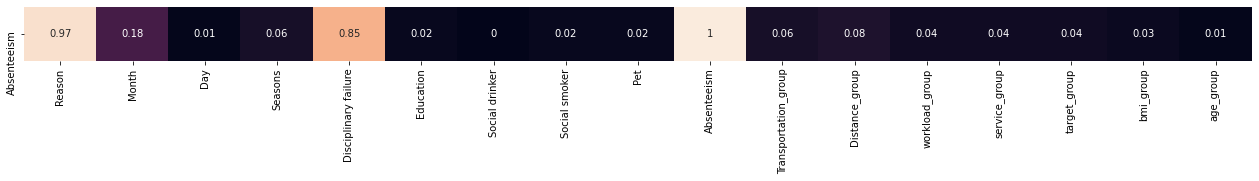

In [55]:
plt.figure(figsize=(22, 1))
sns.heatmap(data_theils, annot=True, cbar=False)
plt.show()

In [56]:
#recheck with more detailed data
df_corr = df_clean.drop(columns = ['Reason','Month', 'Day', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker',
                                  'Pet'])
df_corr.corr()

,Transportation expense,Distance,Service time,Age,Workload,Hit target,Son,BMI,Absenteeism
Transportation expense,1.00,0.26,-0.35,-0.23,0.01,-0.08,0.38,-0.14,-0.08
Distance,0.26,1.00,0.13,-0.15,-0.07,-0.01,0.05,0.11,0.06
Service time,-0.35,0.13,1.00,0.67,-0.00,-0.01,-0.05,0.50,-0.00
Age,-0.23,-0.15,0.67,1.00,-0.04,-0.04,0.06,0.47,-0.12
Workload,0.01,-0.07,-0.00,-0.04,1.00,-0.09,0.03,-0.09,-0.03
Hit target,-0.08,-0.01,-0.01,-0.04,-0.09,1.00,-0.01,-0.09,0.14
Son,0.38,0.05,-0.05,0.06,0.03,-0.01,1.00,-0.14,-0.07
BMI,-0.14,0.11,0.50,0.47,-0.09,-0.09,-0.14,1.00,-0.10
Absenteeism,-0.08,0.06,-0.00,-0.12,-0.03,0.14,-0.07,-0.10,1.00


Most features seems have low correlation value to Absenteeism Time, except Reason and Disciplinary failure (0.97 and 0.85)

In [57]:
## To ensure corelation, further analysis will be conducted

### UNIVARIATE ANALYSIS

#### Reason

In [58]:
df_clean['Reason'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason, dtype: int64

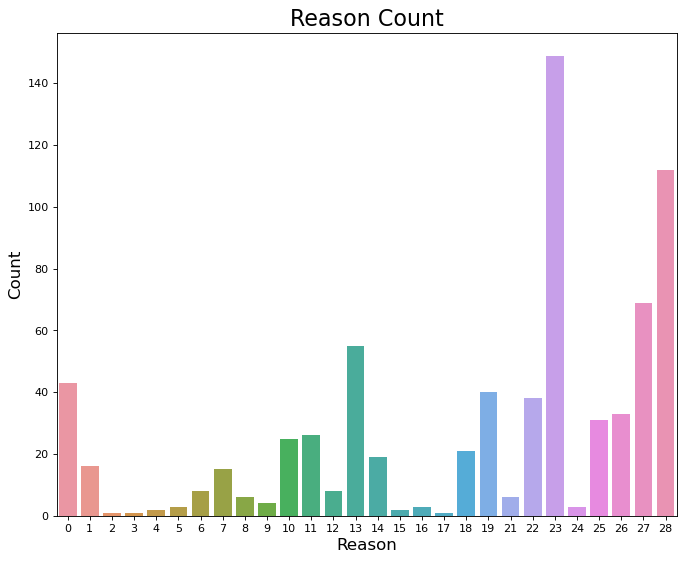

In [59]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['Reason'])
plt.title('Reason Count', size =20)
plt.xlabel("Reason",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Employee's absenteeism caused by reason 23 (medical consultation) with 149 (20%), followed by reason 28 (dental consultation) with  (15%).

#### Transportation Expense

In [60]:
df_clean['Transportation_group'].value_counts()

150-200    231
200-250    210
250-300    141
<150        92
>350        50
300-350     16
Name: Transportation_group, dtype: int64

In [61]:
df_clean['Transportation_group'].value_counts(normalize=True)

150-200   0.31
200-250   0.28
250-300   0.19
<150      0.12
>350      0.07
300-350   0.02
Name: Transportation_group, dtype: float64

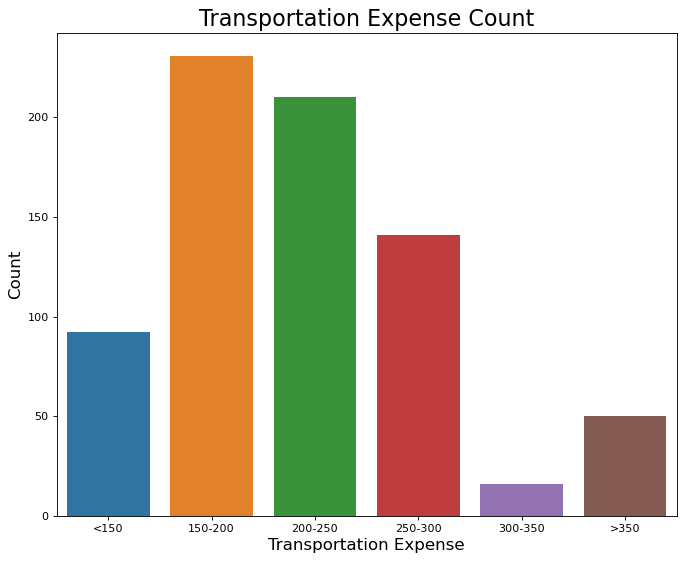

In [62]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['Transportation_group'])
plt.title('Transportation Expense Count', size =20)
plt.xlabel("Transportation Expense",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Employee's transportation expense mostly in range 150-200 (31%), followed by 200-250 (28%), and 250-300 (19%). Transportation Expense more than 300 only 0.09% from total

#### Distance Resident to Work

In [63]:
df_clean['Distance_group'].value_counts()

20-30    223
10-20    167
>50      144
30-40     79
40-50     66
<10       61
Name: Distance_group, dtype: int64

In [64]:
df_clean['Distance_group'].value_counts(normalize= True)

20-30   0.30
10-20   0.23
>50     0.19
30-40   0.11
40-50   0.09
<10     0.08
Name: Distance_group, dtype: float64

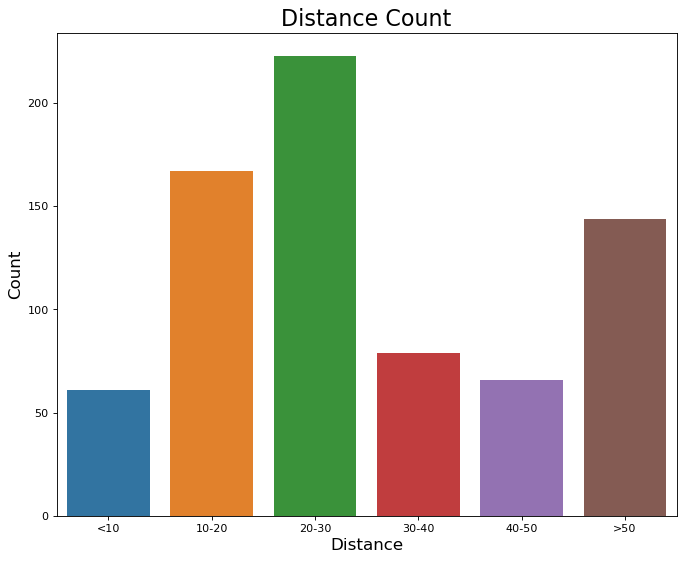

In [65]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['Distance_group'])
plt.title('Distance Count', size =20)
plt.xlabel("Distance",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Employee's resident distance from  work mostly in range 20-30 (30%), followed by 10-20 (23%), and >50 (19%). <10 is the lowest (8%) and 40-50 come close(9%)

#### Service Time

In [66]:
df_clean['service_group'].value_counts()

10-15    273
5-10     208
15-20    205
<5        47
>20        7
Name: service_group, dtype: int64

In [67]:
df_clean['service_group'].value_counts(normalize=True)

10-15   0.37
5-10    0.28
15-20   0.28
<5      0.06
>20     0.01
Name: service_group, dtype: float64

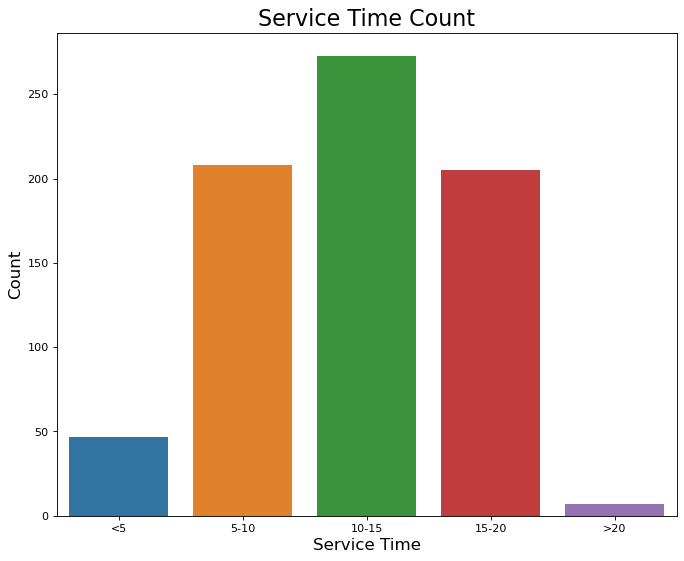

In [68]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['service_group'])
plt.title('Service Time Count', size =20)
plt.xlabel("Service Time",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most employees (37%) have been in company for 10-15 years, followed by 5-10 and 15-20 with 28%. Employees with service time <5 and >20 only consists of 7% employee

#### Workload

In [69]:
df_clean['workload_group'].value_counts()

250-300    318
200-250    255
300-350    135
>350        32
Name: workload_group, dtype: int64

In [70]:
df_clean['workload_group'].value_counts(normalize=True)

250-300   0.43
200-250   0.34
300-350   0.18
>350      0.04
Name: workload_group, dtype: float64

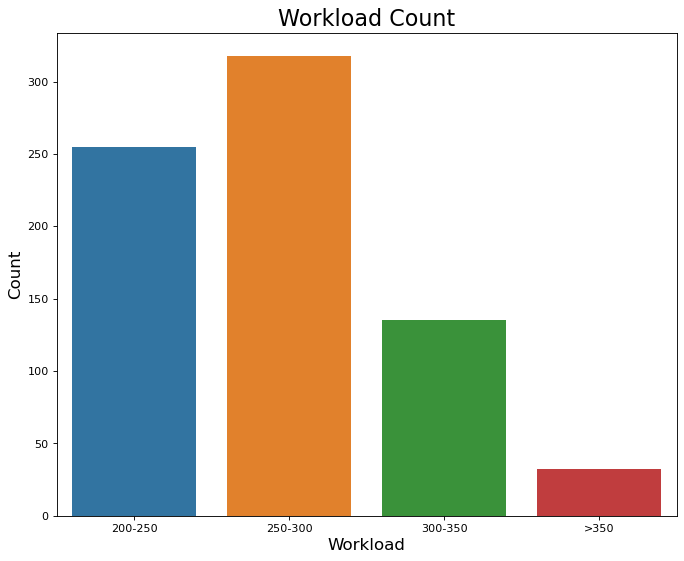

In [71]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['workload_group'])
plt.title('Workload Count', size =20)
plt.xlabel("Workload",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority employee have workload of 250-300 (43%), followed by 200-250 (34%), while the lower is >350 with only 4%

#### Hit Target

In [72]:
df_clean['target_group'].value_counts()

95-100    343
90-95     338
85-90      40
<85        19
Name: target_group, dtype: int64

In [73]:
df_clean['target_group'].value_counts(normalize=True)

95-100   0.46
90-95    0.46
85-90    0.05
<85      0.03
Name: target_group, dtype: float64

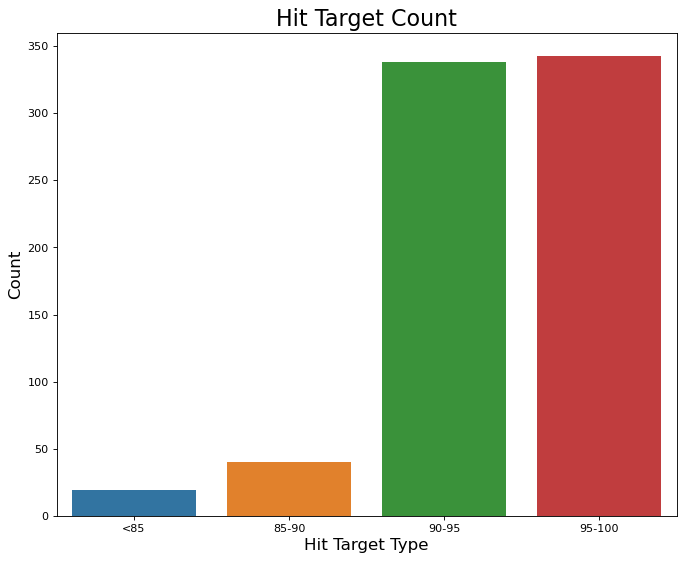

In [74]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['target_group'])
plt.title('Hit Target Count', size =20)
plt.xlabel("Hit Target Type",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Employee hit target is pretty imbalanced, 92% from total data only consist by 90-95 and 95-100 with a really similar numbers.

#### Disciplinary Failure

In [75]:
df_clean['Disciplinary failure'].value_counts()

0    700
1     40
Name: Disciplinary failure, dtype: int64

In [76]:
df_clean['Disciplinary failure'].value_counts(normalize=True)

0   0.95
1   0.05
Name: Disciplinary failure, dtype: float64

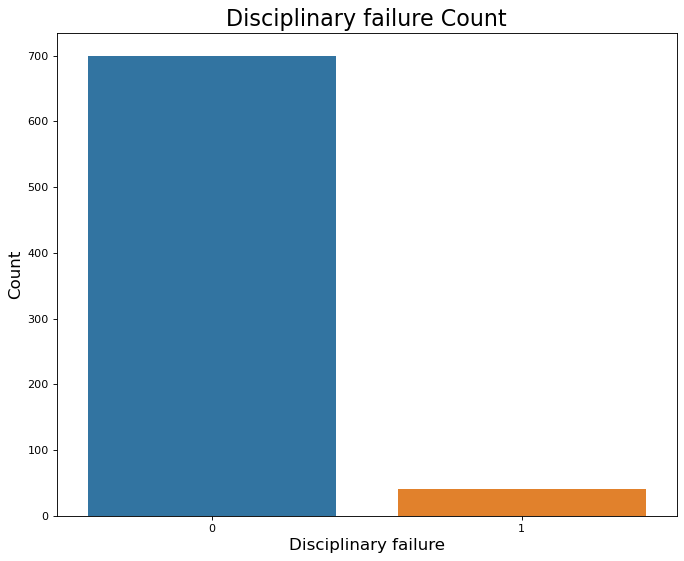

In [77]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['Disciplinary failure'])
plt.title('Disciplinary failure Count', size =20)
plt.xlabel("Disciplinary failure",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Almost all employee doesn't have disciplinary failure (95%)

#### Social Drinker Status

In [78]:
df_clean['Social drinker'].value_counts()

1    420
0    320
Name: Social drinker, dtype: int64

In [79]:
df_clean['Social drinker'].value_counts(normalize=True)

1   0.57
0   0.43
Name: Social drinker, dtype: float64

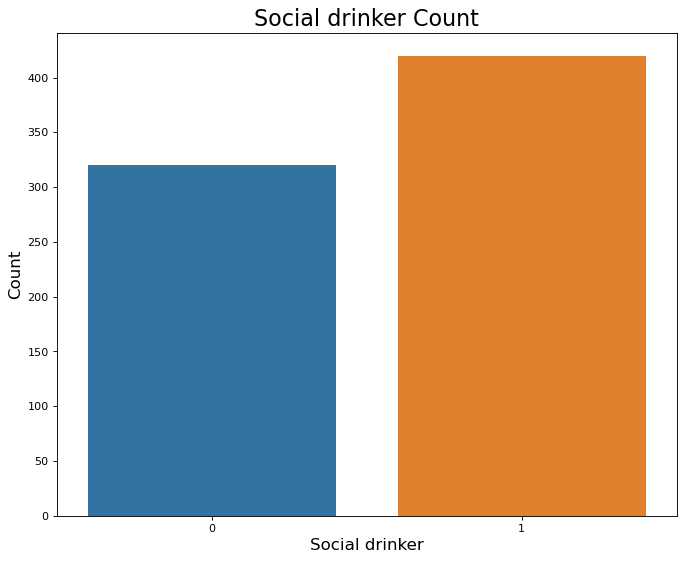

In [80]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['Social drinker'])
plt.title('Social drinker Count', size =20)
plt.xlabel("Social drinker",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Category employee by social drinker status is pretty balanced (57:43)

#### Social smoker Status

In [81]:
df_clean['Social smoker'].value_counts()

0    686
1     54
Name: Social smoker, dtype: int64

In [82]:
df_clean['Social smoker'].value_counts(normalize=True)

0   0.93
1   0.07
Name: Social smoker, dtype: float64

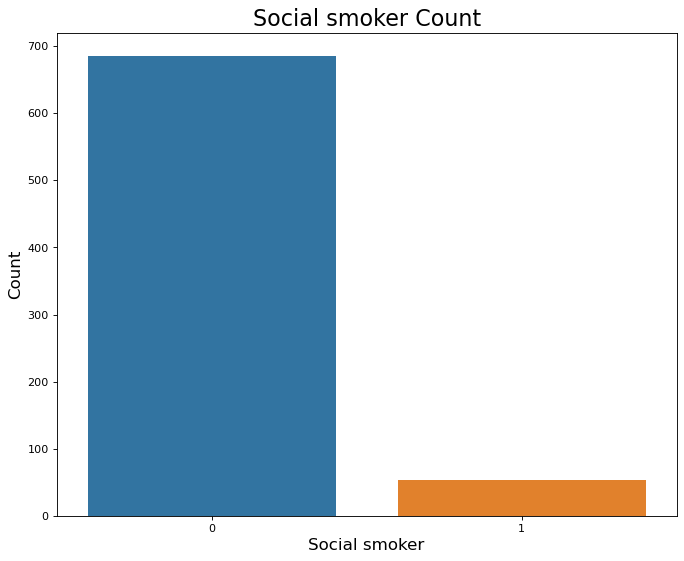

In [83]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['Social smoker'])
plt.title('Social smoker Count', size =20)
plt.xlabel("Social smoker",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority employee is a social smoker (93%)

#### Absentee Status

In [84]:
df_clean['Absenteeism'].value_counts()

1    696
0     44
Name: Absenteeism, dtype: int64

In [85]:
df_clean['Absenteeism'].value_counts(normalize=True)

1   0.94
0   0.06
Name: Absenteeism, dtype: float64

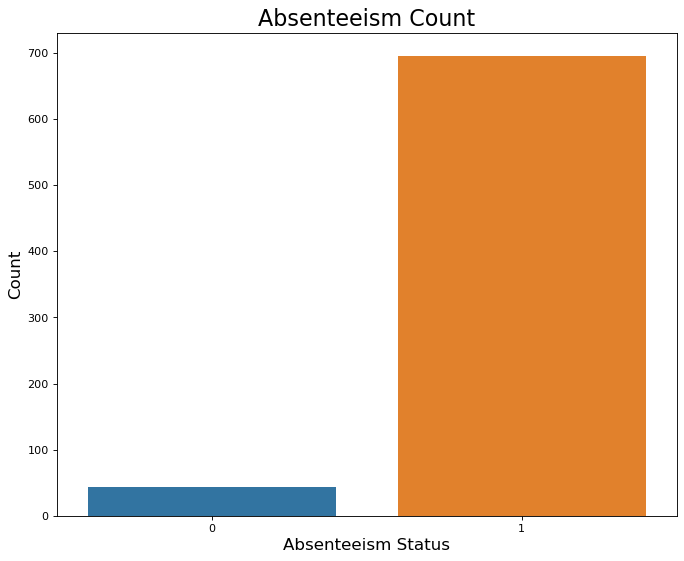

In [86]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_clean['Absenteeism'])
plt.title('Absenteeism Count', size =20)
plt.xlabel("Absenteeism Status",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority employee have absentee problem (94%). It's also show that this data is imbalanced

### MULTIVARIATE ANALYSIS
##### Initial Hypothesis
- Disciplinary failure affect Absenteeism Status
- Son affect Absenteeism Status
- Workload affect Absenteeism Status
- Distance affect Absenteeism Status
- Hit Target affect Absenteeism Status

In [87]:
df_clean.head()

,Reason,Month,Day,Seasons,Transportation expense,Distance,Service time,Age,Workload,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,BMI,Absenteeism,Transportation_group,Distance_group,workload_group,service_group,target_group,bmi_group,age_group
0,26,7,3,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1,250-300,30-40,200-250,10-15,95-100,Pre-obesity,Young Adults
1,0,7,3,1,118,13,18,50,239.55,97,1,1,1,1,0,0,31,0,<150,10-20,200-250,15-20,95-100,Obesity class I,Middle-Aged Adults
2,23,7,4,1,179,51,18,38,239.55,97,0,1,0,1,0,0,31,1,150-200,>50,200-250,15-20,95-100,Obesity class I,Middle-Aged Adults
3,7,7,5,1,279,5,14,39,239.55,97,0,1,2,1,1,0,24,1,250-300,<10,200-250,10-15,95-100,Normal weight,Middle-Aged Adults
4,23,7,5,1,289,36,13,33,239.55,97,0,1,2,1,0,1,30,1,250-300,30-40,200-250,10-15,95-100,Pre-obesity,Young Adults


#### Disciplinary failure VS Absenteeism

In [88]:
pd.crosstab(index = df_clean['Disciplinary failure'], columns = df_clean['Absenteeism'])

Absenteeism,0,1
Disciplinary failure,,
0,4,696
1,40,0


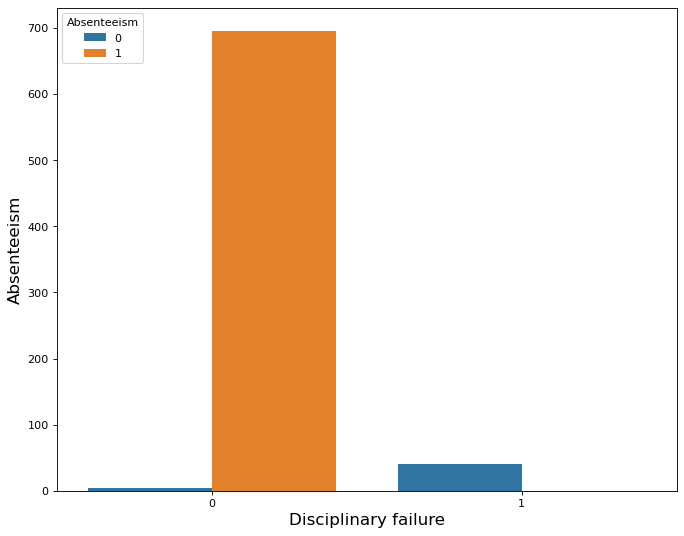

In [89]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('Disciplinary failure', data = df_clean, hue = 'Absenteeism')
plt.xlabel("Disciplinary failure",size = 15)
plt.ylabel("Absenteeism", size = 15)
plt.show()

- Employee who has absentee problem dominated 100% by employee who doesn't have disciplinary failure. Meanwhile those who doesn't have absentee problem dominated by employee who have disciplinary failure (91%)

#### Number of Children VS Absenteeism

In [90]:
pd.crosstab(index = df_clean['Son'], columns = df_clean['Absenteeism'])

Absenteeism,0,1
Son,,
0,9,289
1,20,209
2,10,146
3,2,13
4,3,39


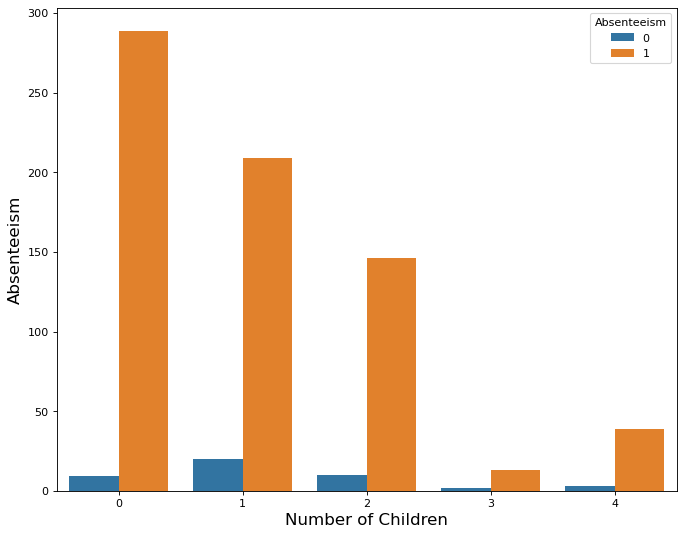

In [91]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('Son', data = df_clean, hue = 'Absenteeism')
plt.xlabel("Number of Children",size = 15)
plt.ylabel("Absenteeism", size = 15)
plt.show()

- Employee who has absentee problem dominated by employee who doesn't have a child with 45% (289 of 640), followed with those who have 1 child and 2 children (37% and 23%). 

- It shows that employee who has more children than others tend to not have absentee problem

#### Workload vs Absenteeism

In [92]:
pd.crosstab(index = df_clean['workload_group'], columns = df_clean['Absenteeism'])

Absenteeism,0,1
workload_group,,
200-250,12,243
250-300,26,292
300-350,2,133
>350,4,28


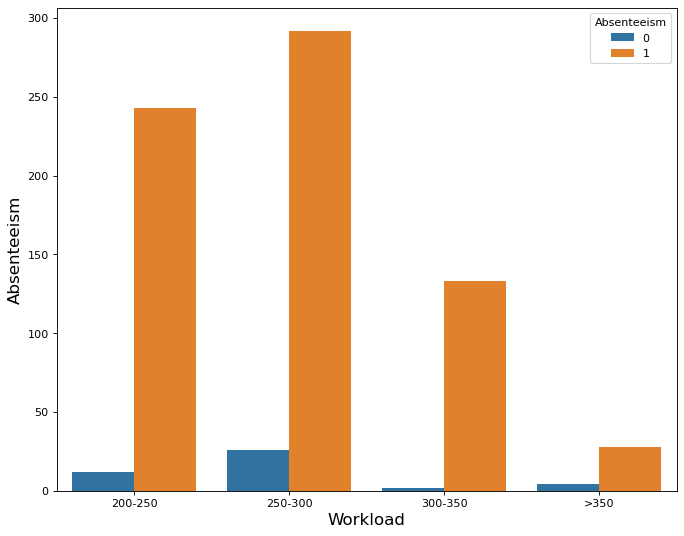

In [93]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('workload_group', data = df_clean, hue = 'Absenteeism')
plt.xlabel("Workload",size = 15)
plt.ylabel("Absenteeism", size = 15)
plt.show()

- Employee who has absentee problem dominated by employee who have workload of 250-300 with 292 of 640 employee (46%), followed with those who have 200-250 and 300-350 children (38% and 21%). 

- If we compare employee's absentee, employee with absentee problem is 95% from all total employee with 200-250 workload, compared with those employee who have workload 300-350, in this range workload, employee with absentee problem is 97%

#### Distance vs Absenteeism

In [94]:
pd.crosstab(index = df_clean['Distance_group'], columns = df_clean['Absenteeism'])

Absenteeism,0,1
Distance_group,,
<10,3,58
10-20,19,148
20-30,7,216
30-40,6,73
40-50,8,58
>50,1,143


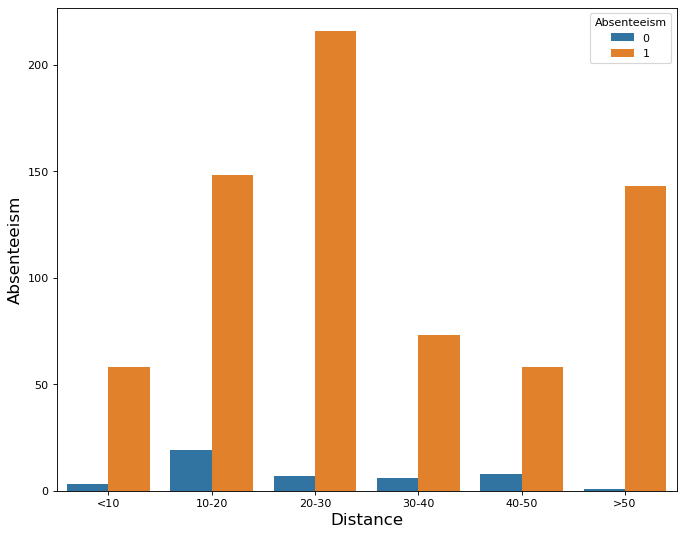

In [95]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('Distance_group', data = df_clean, hue = 'Absenteeism')
plt.xlabel("Distance",size = 15)
plt.ylabel("Absenteeism", size = 15)
plt.show()

- Employee who has absentee problem dominated by employee who have distance's resident of 20-30 with 216 of 640 employee (34%), followed with those who have 10-20 and >50 distance's resident from work (22% and 23%). 

- From the data above, we can say that Distance doesn't affect Employee's Absentee

#### Hit Target VS Absenteeism

In [96]:
pd.crosstab(index = df_clean['target_group'], columns = df_clean['Absenteeism'])

Absenteeism,0,1
target_group,,
<85,4,15
85-90,7,33
90-95,19,319
95-100,14,329


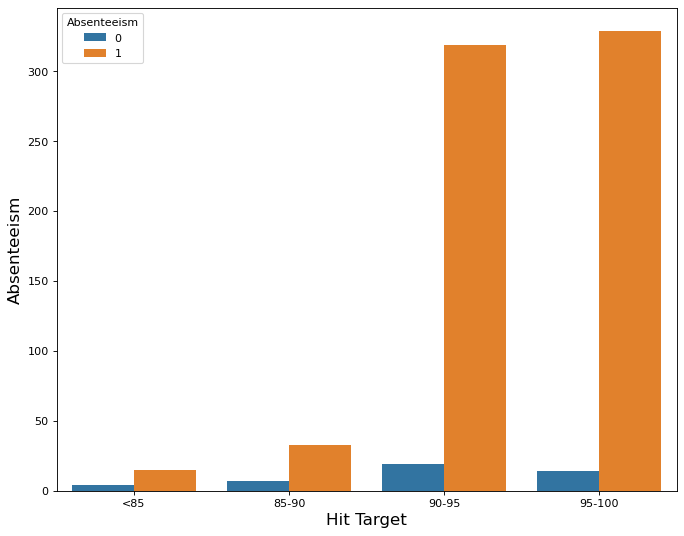

In [97]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('target_group', data = df_clean, hue = 'Absenteeism')
plt.xlabel("Hit Target",size = 15)
plt.ylabel("Absenteeism", size = 15)
plt.show()

- Patients who has absentee problem dominated by employee who achieve 95-100 target with 51.40%, followed closely with those who achieve 90-95 with 49.84%

- If we compare employee's absentee, from all employee from who achieve 85-90 target, it dominated by 82.5% employee who have absentee problem, while from all employee from who achieve <85target, it dominated by 78.95% employee who have absentee problem. 
- 95-100 dominated by 96% employee who have absentee problem and 90-95 dominated by 94% employee who have absentee problem

- From the data above, we can say that Hit Target doesn't affect Employee's Absentee

#### BMI vs Absenteeism

In [98]:
pd.crosstab(index = df_clean['bmi_group'], columns = df_clean['Absenteeism'])

Absenteeism,0,1
bmi_group,,
Normal weight,22,368
Pre-obesity,4,142
Obesity class I,13,167
Obesity class II,5,19


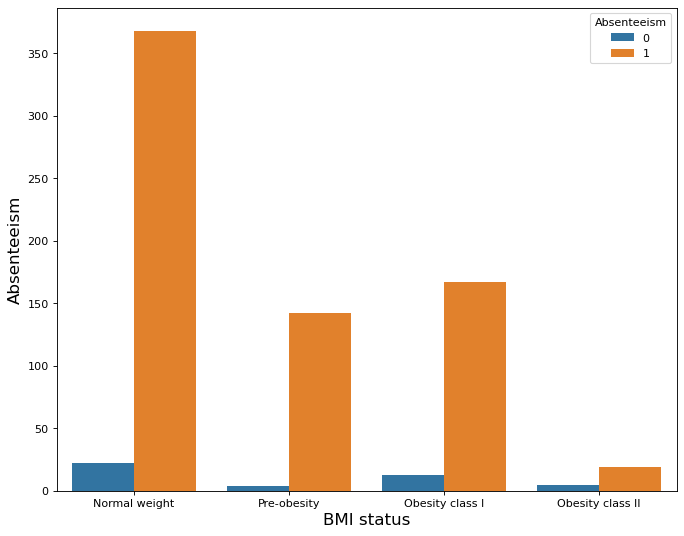

In [99]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('bmi_group', data = df_clean, hue = 'Absenteeism')
plt.xlabel("BMI status",size = 15)
plt.ylabel("Absenteeism", size = 15)
plt.show()

- Patients who has absentee problem dominated by employee who have Normal Weight by 57.5%, followed Pre-obesity and Obesity Class I with similar numbers.

- It shows that BMI doesn't affect Absenteeism

# DATA INSIGHT

-	Majority Employee's absenteeism caused by reason 23 (medical consultation) with 149 (20%), followed by reason 28 (dental consultation) with (15%).
-	Employee's transportation expense mostly in range 150-200 (31%), followed by 200-250 (28%), and 250-300 (19%). Transportation Expense more than 300 only 0.09% from total. Expense 300-350 and after 350 can be recategorize to >300
-	Employee's resident distance from work mostly in range 20-30 (30%), followed by 10-20 (23%), and >50 (19%). <10 is the lowest (8%) and 40-50 come close (9%). Distance 40-50 and >50can be recategorize to >40
-	Most employees (37%) have been in company for 10-15 years, followed by 5-10 and 15-20 with 28%. Employees with service time <5 and >20 only consists of 7% employee. Employees with service time <5 and >20 can be recategorize or dropped
-	Majority employee is Middle-Aged Adults with 59%, followed by Young Adults (39%), and Old Adults  with only 1%. Old Adults can be recategorize or dropped
-	Majority employee have workload of 250-300 (43%), followed by 200-250 (34%), while the lower is >350 with only 4%. >350 can be recategorize or dropped
-	Majority employee has workload 250-300 (43%), followed by 200-250 with 34%. >350 only 0.04%
-	Employee hit target is pretty imbalanced, 92% from total data only consist by 90-95 and 95-100 with a really similar numbers.
-	Almost all employee doesn't have disciplinary failure (95%)
-	Category employee by social drinker status is pretty balanced (57:43)
-	Majority employee is a social smoker (93%)


- All of the feature in the dataset either have low correlation value to the target or have a really strong correlation value to the target.
-	Disciplinary failure status really affect Employee's Absentee
-	Employee who has more children than others tend to not have absentee problem
- Distance doesn't affect Employee's Absentee
-	Hit Target doesn't affect Employee's Absentee
-	BMI doesn't affect Absenteeism

# Feature Selection

In [100]:
## Splitting data
#Drop reason for absence since it's too obvious 
X = df_eda.drop(columns=['Reason for absence', 'Absenteeism'])
y = df_eda['Absenteeism']

In [101]:
df_eda['Absenteeism'].value_counts()

1    696
0     44
Name: Absenteeism, dtype: int64

In [102]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= .20, random_state=420)

In [103]:
X_train.shape

(592, 16)

In [104]:
X_test.shape

(148, 16)

In [105]:
y_train.shape

(592,)

In [106]:
y_test.shape

(148,)

In [107]:
df_eda.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index', 'Absenteeism'],
      dtype='object')

# Data Modelling

In [110]:
# num_columns = ['enrollee_id','city_development_index', 'training_hours']
num_columns = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',
              'Hit target', 'Son', 'Pet', 'Body mass index']

cat_columns = ['Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 
              'Social drinker', 'Social smoker']

# cat_scaling = ['smoking_status']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

# numeric_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=3, include_bias=False)),
#     ('power', PowerTransformer(method='yeo-johnson'))
# ])


categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

# categoric_pipeline_scaling = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('encoder', OneHotEncoder()),
#     ('scaler', StandardScaler())
# ])

# preprocessor = ColumnTransformer([
#     ('numeric', numeric_pipeline, num_columns),
#     ('categorical', categoric_pipeline, cat_columns),
#     ('categorical scaling', categoric_pipeline_scaling, cat_scaling)
# ])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categorical', categoric_pipeline, cat_columns),
])


pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier(class_weight='balanced'))
])

pipe_SVM = Pipeline([
    ("prep", preprocessor),
    ("algo", SVC(probability=True, class_weight = 'balanced'))
])

pipe_KNN = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier(weights = 'uniform'))
])

pipe_LR = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression(class_weight ='balanced'))
])

## Random Forest

In [111]:
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Transportation expense',
                                                   'Distance from Residence to '
                                                   'Work',
                                                   'Service time', 'Age',
                                                   'Work load Average/day ',
                                                   'Hit target', 'Son', 'Pet',
                                                   'Body mass index']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strate

In [112]:
y_pred_RF_ts = pipe_RF.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred_RF_ts))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      1.00       138

    accuracy                           0.99       148
   macro avg       1.00      0.95      0.97       148
weighted avg       0.99      0.99      0.99       148



In [114]:
cm_RF = confusion_matrix(y_test, y_pred_RF_ts, labels=[0, 1])

In [115]:
df_RF = pd.DataFrame(cm_RF, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_RF

,Pred 1,Pred 0
Akt 1,9,1
Akt 0,0,138


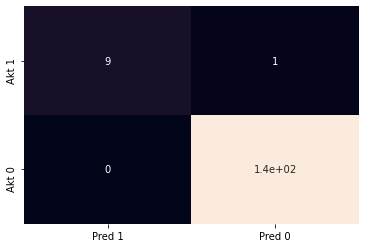

In [116]:
sns.heatmap(df_RF, annot=True, cbar=False)
plt.show()

### Random Forest Hypertuning Parameter

In [117]:
pipe_RF.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['Transportation expense',
                                     'Distance from Residence to Work',
                                     'Service time', 'Age',
                                     'Work load Average/day ', 'Hit target', 'Son',
                                     'Pet', 'Body mass index']),
                                   ('categorical',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['Month of absence', 'Day of the week',
                                     'Seasons', 'Disciplinary failure',
                                     'Education', 'Social drinker',
                                     'Social smoker'])])),
  ('

In [118]:
param_RF = {
    'algo__n_estimators' : np.arange(100,501,200),
    'algo__max_depth' : [None, 5, 10, 25, 50],
#     "prep__numeric__poly__degree" : [2, 3, 4],
    'algo__min_samples_leaf' : np.arange(1,101, 50),
    'algo__max_features' : [0.3,0.5,0.7],
    "algo__class_weight" : [{0:x, 1: 1 - x} for x in [.1, .20, .35, .40]]
#      "algo__class_weight" : [{0:x, 1: 1 - x} for x in [.1, .20, .35, .40]]
}

In [119]:
skf = StratifiedKFold(n_splits=3, random_state=42, shuffle = True, )

In [120]:
RF_RS= RandomizedSearchCV(pipe_RF, param_RF, cv=skf, n_iter=50, n_jobs=-1, verbose=1, random_state=42, scoring='recall')

In [121]:
RF_RS.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   16.4s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['Transportation '
                                                                                'expense',
                                                                                'Distance '
                                                                                'from '
                                                                                'Residence '
                                                                                'to '
   

In [122]:
RF_RS.best_params_

{'algo__n_estimators': 500,
 'algo__min_samples_leaf': 1,
 'algo__max_features': 0.5,
 'algo__max_depth': 10,
 'algo__class_weight': {0: 0.35, 1: 0.65}}

In [123]:
RF_Tuned_RS = RF_RS.best_estimator_

In [124]:
y_ts_RF1 = RF_Tuned_RS.predict(X_test)

In [125]:
print(classification_report(y_test, y_ts_RF1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      1.00       138

    accuracy                           0.99       148
   macro avg       1.00      0.95      0.97       148
weighted avg       0.99      0.99      0.99       148



In [126]:
cm_RF1_Tuned = confusion_matrix(y_test, y_ts_RF1, labels=[1, 0])

In [211]:
df_RF1_Tuned = pd.DataFrame(cm_RF1_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_RF1_Tuned

,Pred 1,Pred 0
Akt 1,138,0
Akt 0,1,9


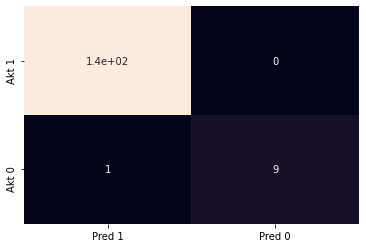

In [212]:
sns.heatmap(df_RF1_Tuned, annot=True, cbar=False)
plt.show()

# SVM

In [213]:
pipe_SVM.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Transportation expense',
                                                   'Distance from Residence to '
                                                   'Work',
                                                   'Service time', 'Age',
                                                   'Work load Average/day ',
                                                   'Hit target', 'Son', 'Pet',
                                                   'Body mass index']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strate

In [214]:
y_SVM1 = pipe_SVM.predict(X_test)

In [215]:
print(classification_report(y_test, y_SVM1))

              precision    recall  f1-score   support

           0       0.09      0.40      0.14        10
           1       0.94      0.70      0.80       138

    accuracy                           0.68       148
   macro avg       0.51      0.55      0.47       148
weighted avg       0.88      0.68      0.76       148



In [216]:
cm_SVM1_Tuned = confusion_matrix(y_test, y_SVM1, labels=[1, 0])

In [217]:
df_SVM1_Tuned = pd.DataFrame(cm_SVM1_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_SVM1_Tuned

,Pred 1,Pred 0
Akt 1,96,42
Akt 0,6,4


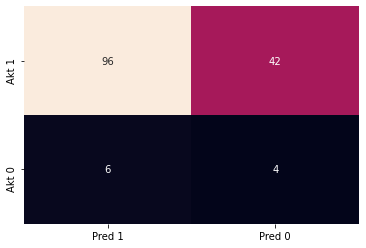

In [218]:
sns.heatmap(df_SVM1_Tuned, annot=True, cbar=False)
plt.show()

### SVM Hypertuning Parameter

In [219]:
pipe_SVM.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['Transportation expense',
                                     'Distance from Residence to Work',
                                     'Service time', 'Age',
                                     'Work load Average/day ', 'Hit target', 'Son',
                                     'Pet', 'Body mass index']),
                                   ('categorical',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['Month of absence', 'Day of the week',
                                     'Seasons', 'Disciplinary failure',
                                     'Education', 'Social drinker',
                                     'Social smoker'])])),
  ('

In [220]:
param_SVM = {
    'algo__C' : np.logspace(-3 , 3, 7), #semakin tinggi, semakin kompleks. kalau overfit, kurangin nilai C
    "algo__gamma" : np.arange(10, 101, 25), #semakin tinggi, semakin kompleks. kalau overfit, kurangin nilai gamma
    "algo__class_weight" : [{0:x, 1: 1 - x} for x in [.1, .20, .35, .40]]
}

In [221]:
skf = StratifiedKFold(n_splits=3, random_state=42, shuffle = True, )

In [222]:
SVM_RS= RandomizedSearchCV(pipe_SVM, param_SVM, cv=skf, n_iter=50, n_jobs=-1, verbose=1, random_state=42, scoring='recall')

In [223]:
SVM_RS.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.0s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['Transportation '
                                                                                'expense',
                                                                                'Distance '
                                                                                'from '
                                                                                'Residence '
                                                                                'to '
   

In [224]:
SVM_RS.best_params_

{'algo__gamma': 10, 'algo__class_weight': {0: 0.35, 1: 0.65}, 'algo__C': 0.1}

In [225]:
SVM_Tuned_RS = SVM_RS.best_estimator_

In [226]:
y_ts_SVM1 = SVM_Tuned_RS.predict(X_test)

In [227]:
print(classification_report(y_test, y_ts_SVM1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.93      1.00      0.97       138

    accuracy                           0.93       148
   macro avg       0.47      0.50      0.48       148
weighted avg       0.87      0.93      0.90       148



In [228]:
cm_SVM1_Tuned = confusion_matrix(y_test, y_ts_SVM1, labels=[1, 0])

In [229]:
df_SVM1_Tuned = pd.DataFrame(cm_SVM1_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_SVM1_Tuned

,Pred 1,Pred 0
Akt 1,138,0
Akt 0,10,0


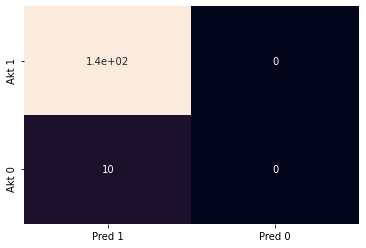

In [230]:
sns.heatmap(df_SVM1_Tuned, annot=True, cbar=False)
plt.show()

### SVM - Fine Tuning

In [231]:
param_SVM2 = {
    'algo__C' : np.logspace(-3 , 3, 7), #semakin tinggi, semakin kompleks. kalau overfit, kurangin nilai C
    "algo__gamma" : np.arange(10, 20, 2), #semakin tinggi, semakin kompleks. kalau overfit, kurangin nilai gamma
    "algo__class_weight" : [{0: 0.1, 1: 0.9}]
}

In [232]:
# {'algo__gamma': 10, 'algo__class_weight': {0: 0.1, 1: 0.9}, 'algo__C': 10.0}

In [233]:
SVM_GS = GridSearchCV(pipe_SVM, param_SVM2, cv = skf, scoring = 'recall', n_jobs = -1, verbose=1)

In [234]:
SVM_GS.fit(X_train, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    1.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Transportation '
                                                                          'expense',
                                                                          'Distance '
                                                                          'from '
                                                                          'Residence '
                                                                          'to '
                                                                     

In [235]:
SVM_GS.best_params_

{'algo__C': 0.001, 'algo__class_weight': {0: 0.1, 1: 0.9}, 'algo__gamma': 10}

In [236]:
SVM_Tuned_GS = SVM_GS.best_estimator_

In [237]:
y_ts_SVM2 = SVM_Tuned_GS.predict(X_test)

In [238]:
print(classification_report(y_test, y_ts_SVM2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.93      1.00      0.97       138

    accuracy                           0.93       148
   macro avg       0.47      0.50      0.48       148
weighted avg       0.87      0.93      0.90       148



In [239]:
cm_SVM2_Tuned = confusion_matrix(y_test, y_ts_SVM2, labels=[1, 0])

In [240]:
df_SVM2_Tuned = pd.DataFrame(cm_SVM2_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_SVM2_Tuned

,Pred 1,Pred 0
Akt 1,138,0
Akt 0,10,0


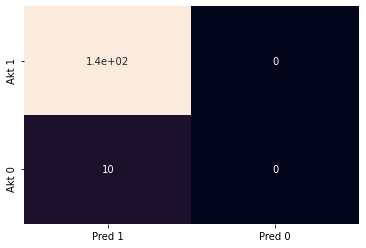

In [241]:
sns.heatmap(df_SVM2_Tuned, annot=True, cbar=False)
plt.show()

### SVM - Fine Tuning 2

In [242]:
param_SVM3 = {
    'algo__C' : np.logspace(-3 , 3, 3), #semakin tinggi, semakin kompleks. kalau overfit, kurangin nilai C
    "algo__gamma" : np.arange(0.03, 0.1, 0.01), #semakin tinggi, semakin kompleks. kalau overfit, kurangin nilai gamma
    "algo__class_weight" : [{0: 0.07, 1: 0.93}]
}

In [243]:
# {'algo__C': 1.0, 'algo__class_weight': {0: 0.05, 1: 0.95}, 'algo__gamma': 0.01}

In [244]:
SVM_GS3 = GridSearchCV(pipe_SVM, param_SVM3, cv = skf, scoring = 'recall', n_jobs = -1, verbose=1)

In [245]:
SVM_GS3.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Transportation '
                                                                          'expense',
                                                                          'Distance '
                                                                          'from '
                                                                          'Residence '
                                                                          'to '
                                                                     

In [246]:
SVM_GS3.best_params_

{'algo__C': 0.001,
 'algo__class_weight': {0: 0.07, 1: 0.93},
 'algo__gamma': 0.03}

In [247]:
SVM_Tuned_GS3 = SVM_GS3.best_estimator_

In [248]:
y_ts_SVM3 = SVM_Tuned_GS3.predict(X_test)

In [249]:
print(classification_report(y_test, y_ts_SVM3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.93      1.00      0.97       138

    accuracy                           0.93       148
   macro avg       0.47      0.50      0.48       148
weighted avg       0.87      0.93      0.90       148



In [250]:
cm_SVM3_Tuned = confusion_matrix(y_test, y_ts_SVM3, labels=[1, 0])

In [251]:
df_SVM3_Tuned = pd.DataFrame(cm_SVM3_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_SVM3_Tuned

,Pred 1,Pred 0
Akt 1,138,0
Akt 0,10,0


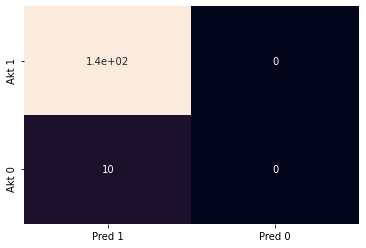

In [252]:
sns.heatmap(df_SVM3_Tuned, annot=True, cbar=False)
plt.show()

## KNN Classifier

In [253]:
pipe_KNN.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Transportation expense',
                                                   'Distance from Residence to '
                                                   'Work',
                                                   'Service time', 'Age',
                                                   'Work load Average/day ',
                                                   'Hit target', 'Son', 'Pet',
                                                   'Body mass index']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strate

In [254]:
y_KNN = pipe_KNN.predict(X_test)

In [255]:
print(classification_report(y_test, y_KNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.93      1.00      0.97       138

    accuracy                           0.93       148
   macro avg       0.47      0.50      0.48       148
weighted avg       0.87      0.93      0.90       148



### KNN Hypertuning Parameter

In [256]:
pipe_KNN.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['Transportation expense',
                                     'Distance from Residence to Work',
                                     'Service time', 'Age',
                                     'Work load Average/day ', 'Hit target', 'Son',
                                     'Pet', 'Body mass index']),
                                   ('categorical',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['Month of absence', 'Day of the week',
                                     'Seasons', 'Disciplinary failure',
                                     'Education', 'Social drinker',
                                     'Social smoker'])])),
  ('

In [257]:
param_KNN = {
    "algo__n_neighbors" : np.arange(1, 51, 2),
    "algo__p" : [1, 2],
    'algo__weights' : ['uniform', 'distance']
}

In [258]:
skf = StratifiedKFold(n_splits=3, random_state=42, shuffle = True, )

In [259]:
KNN_RS= RandomizedSearchCV(pipe_KNN , param_KNN, cv=skf, n_iter=50, n_jobs=-1, verbose=1, random_state=42, scoring='recall')

In [260]:
KNN_RS.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.7s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['Transportation '
                                                                                'expense',
                                                                                'Distance '
                                                                                'from '
                                                                                'Residence '
                                                                                'to '
   

In [261]:
KNN_RS.best_params_

{'algo__weights': 'distance', 'algo__p': 2, 'algo__n_neighbors': 41}

In [262]:
KNN_Tuned_RS = KNN_RS.best_estimator_

In [263]:
y_ts_KNN1 = KNN_Tuned_RS.predict(X_test)

In [264]:
print(classification_report(y_test, y_ts_KNN1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.93      1.00      0.97       138

    accuracy                           0.93       148
   macro avg       0.47      0.50      0.48       148
weighted avg       0.87      0.93      0.90       148



In [265]:
cm_KNN1_Tuned = confusion_matrix(y_test, y_ts_KNN1, labels=[1, 0])

In [266]:
df_KNN1_Tuned = pd.DataFrame(cm_KNN1_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_KNN1_Tuned

,Pred 1,Pred 0
Akt 1,138,0
Akt 0,10,0


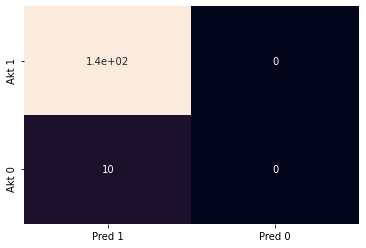

In [267]:
sns.heatmap(df_KNN1_Tuned, annot=True, cbar=False)
plt.show()

### KNN - Fine Tuning

In [268]:
param_KNN2 = {
    "algo__n_neighbors" : np.arange(1, 5, 1),
    "algo__p" : [1, 2, 3],
    'algo__weights' : ['uniform']
}

In [269]:
# {'algo__weights': 'uniform', 'algo__p': 1, 'algo__n_neighbors': 1}

In [270]:
skf = StratifiedKFold(n_splits=3, random_state=42)

In [271]:
KNN_GS = GridSearchCV(pipe_KNN, param_KNN2, cv = skf, scoring = 'recall', n_jobs = -1, verbose=1)

In [272]:
KNN_GS.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Transportation '
                                                                          'expense',
                                                                          'Distance '
                                                                          'from '
                                                                          'Residence '
                                                                          'to '
                                                                    

In [273]:
KNN_GS.best_params_

{'algo__n_neighbors': 3, 'algo__p': 2, 'algo__weights': 'uniform'}

In [274]:
KNN2_Tuned = KNN_GS.best_estimator_

In [275]:
y_ts_KNN2 = KNN2_Tuned.predict(X_test)

In [276]:
print(classification_report(y_test, y_ts_KNN2))

              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.95      0.96      0.96       138

    accuracy                           0.92       148
   macro avg       0.66      0.63      0.65       148
weighted avg       0.91      0.92      0.91       148



In [277]:
cm_KNN2_Tuned = confusion_matrix(y_test, y_ts_KNN2, labels=[1, 0])

In [278]:
df_KNN2_Tuned = pd.DataFrame(cm_KNN2_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_KNN2_Tuned

,Pred 1,Pred 0
Akt 1,133,5
Akt 0,7,3


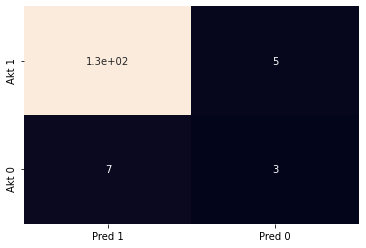

In [279]:
sns.heatmap(df_KNN2_Tuned, annot=True, cbar=False)
plt.show()

# Summary

- Since our objection is to detect employee who might be has absentee problem, we focused on lowering False Negative number as act of precautions, since it might be a problem to company if there's  employee who has absentee problem but not detected by the model.

- Random Forest Classifier  Model has the best result, while  SVM and KNN is far behind in terms of the result

# Model Comparison

In [280]:
print('Classification Report Comparison')
print('Random Forest Classifier')
print(classification_report(y_test, y_ts_RF1))
print('SV Classifier')
print(classification_report(y_test, y_ts_SVM2))
print('KNM Classifier')
print(classification_report(y_test, y_ts_KNN2))

Classification Report Comparison
Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      1.00       138

    accuracy                           0.99       148
   macro avg       1.00      0.95      0.97       148
weighted avg       0.99      0.99      0.99       148

SV Classifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.93      1.00      0.97       138

    accuracy                           0.93       148
   macro avg       0.47      0.50      0.48       148
weighted avg       0.87      0.93      0.90       148

KNM Classifier
              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.95      0.96      0.96       138

    accuracy                           0.92       148
   macro avg       0.66      0.63      0.

In [295]:
print('Confusion Matrix Comparison')
print('Random Forest Classifier')
print(df_RF1_Tuned)
print('SV Classifier')
print(df_SVM2_Tuned)
print('KNM Classifier')
print(df_KNN2_Tuned)

Confusion Matrix Comparison
Random Forest Classifier
       Pred 1  Pred 0
Akt 1     138       0
Akt 0       1       9
SV Classifier
       Pred 1  Pred 0
Akt 1     138       0
Akt 0      10       0
KNM Classifier
       Pred 1  Pred 0
Akt 1     133       5
Akt 0       7       3


# Best Model

- Random Forest Classifier with Fine Tuning have the strongest results based on the recall score to predict employee with absentee problem (1) with score of 1, and employee without absentee problem with score 0.89 with False Positive 1 and False Negative 0.

In [282]:
print(classification_report(y_test, y_ts_RF1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      1.00       138

    accuracy                           0.99       148
   macro avg       1.00      0.95      0.97       148
weighted avg       0.99      0.99      0.99       148



In [283]:
df_RF1_Tuned

,Pred 1,Pred 0
Akt 1,138,0
Akt 0,1,9


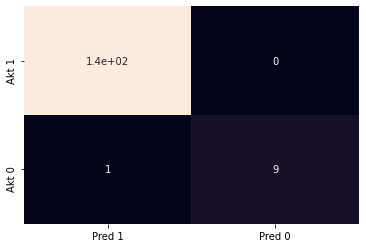

In [284]:
sns.heatmap(df_RF1_Tuned, annot=True, cbar=False)
plt.show()

# Input for next model
- Improve the dataset since it's pretty imbalanced both from the target's column and feature's columns.
- Find another feature since all of the feature in the dataset either have low correlation value to the target or have a really strong correlation value to the target.

- Next model also can be improved to predict how much time wasted each employee that has absentee problem

# Export Model

In [285]:
# joblib.dump(RF_Tuned_RS, 'ModelEmployeeRF')

['ModelEmployeeRF']